<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting "Greenness" Of Content

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---


This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# set max printout options for pandas:
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

### 1. Load the data
- Note it is a `.tsv` file and has a tab separator instead of comma.
- Clean the `is_news` column.
- Make two new columns, `title` and `body`, from the `boilerplate` column.

> **Note:** The `boilerplate` column is in json dictionary format. You can use the `json.loads()` function from the `json` module to convert this into a python dictionary.

In [2]:
evergreen_tsv = '/Users/Mahendra/desktop/GA/hw/5.4.2_classification-logistic_regression-lab/datasets/evergreen_sites.tsv'

In [30]:
# A:
evergreen=pd.read_csv('/Users/Mahendra/desktop/GA/hw/5.4.2_classification-logistic_regression-lab/datasets/evergreen_sites.tsv',sep="\t",na_values={'is_news' : '?'}).fillna(0)
evergreen=evergreen.reset_index()
evergreen

,index,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.000000,0,0.090774,0,0.245831,0.003883,1.0,1,24,0,5424,170,8,0.152941,0.079130,0
1,1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.000000,0,0.098707,0,0.203490,0.088652,1.0,1,40,0,4973,187,9,0.181818,0.125448,1
2,2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.000000,0,0.072448,0,0.226402,0.120536,1.0,1,55,0,2240,258,11,0.166667,0.057613,1
3,3,http://www.dumblittleman.com/2007/12/10-foolproof-tips-for-better-sleep.html,6684,"{""title"":""10 Foolproof Tips for Better Sleep "",""body"":""There was a period in my life when I had a lot of problems with sleep It took me very long to fall asleep I was easily awaken and I simply wasn t getting enough of rest at night I didn t want to take medication and this led me to learn sever...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.000000,0,0.095861,0,0.265656,0.035343,1.0,0,24,0,2737,120,5,0.041667,0.100858,1
4,4,http://bleacherreport.com/articles/1205138-the-50-coolest-jerseys-you-didnt-know-existed?show_full=,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen"",""body"":""Jersey sales is a curious business Whether you re buying the stylish top to represent your favorite team player or color you re always missing out on better artwork With No 18 Colts jerseys continu...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.000000,0,0.024908,0,0.228887,0.050473,1.0,1,14,0,12032,162,10,0.098765,0.082569,0
5,5,http://www.conveniencemedical.com/genital-herpes-home.php,7018,"{""url"":""conveniencemedical genital herpes home php"",""title"":""Genital Herpes Treatment "",""body"":""Genital herpes is caused by herpes simplex virus HSV 1 the most common type usually appears as cold sores on the mouth and lips whereas HSV 2 affects the genitals buttocks and rectum Patient s have re...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,0.434639,0.000000,0,0.019841,0,0.298300,0.038636,0.0,0,12,?,4368,55,3,0.054545,0.087356,0
6,6,http://gofashionlane.blogspot.tw/2012/06/american-wild-child.html,8685,"{""title"":""fashion lane American Wild Child "",""body"":""Our favorite summer holiday is just around the corner a

### 2. What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events).
- Stored as a binary indicator in the `label` column.
- Look at some examples.

In [31]:
# A:
evergreen.columns

Index([u'index', u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label'],
      dtype='object')

In [32]:
evergreen.boilerplate.unique()

array([ '{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in 

In [33]:
evergreen['title'] = evergreen.boilerplate.map(lambda x: json.loads(x).get('title', ''))
evergreen['body'] = evergreen.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [34]:
evergreen[['title','body','label']].head(2)

,title,body,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...,0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...,1


### 3. Does being a news site affect green-ness?

**3.A Investigate with plots/EDA.**

In [39]:
evergreen.groupby('is_news')[['label']].mean()


,label
is_news,
0.0,0.507562
1.0,0.516916


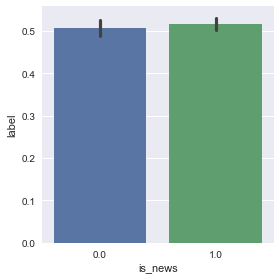

In [41]:
sns.factorplot(x='is_news',y='label',data=evergreen,kind='bar')

**3.B Test the hypothesis with a logistic regression using statsmodels.**

> **Hint:** The `sm.logit` function from `statsmodels.formula.api` will perform a logistic regression using a formula string.

In [45]:
import statsmodels.formula.api as sm


In [48]:
# A:
news_data=evergreen[['is_news','label']]
news_model=sm.logit("label ~ is_news",data=news_data).fit()

Optimization terminated successfully.
         Current function value: 0.692751
         Iterations 3


In [49]:
news_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2017   Pseudo R-squ.:               5.980e-05
Time:                        14:27:20   Log-Likelihood:                -5122.9
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.4337
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0303      0.038      0.806      0.420        -0.043     0.104
is_news        0.0374      0.048      0.783      0.434        -0.056     0.131
==============================================================================
"""

**3.C Interpret the results of your model.**

In [8]:
# A:

### 4. Does the website category affect green-ness?

**4.A Investigate with plots/EDA.**

In [50]:
# A:
evergreen['alchemy_category'] = evergreen.alchemy_category.map(lambda x: 'unknown' if x == '?' else x)

In [51]:
evergreen.groupby('alchemy_category')[['label']].mean()

,label
alchemy_category,
arts_entertainment,0.371945
business,0.711364
computer_internet,0.246622
culture_politics,0.457726
gaming,0.368421
health,0.573123
law_crime,0.419355
recreation,0.684296
religion,0.416667


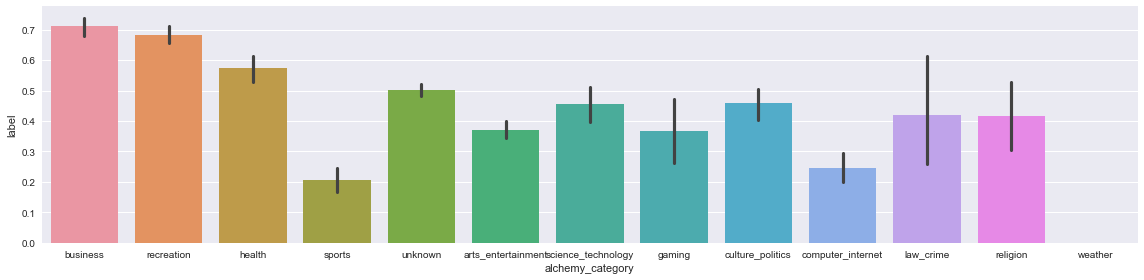

In [55]:
sns.factorplot(x='alchemy_category',y='label',data=evergreen,kind='bar',aspect=4)

**4.B Test the hypothesis with a logistic regression.**

In [59]:
# A:
cat_data=evergreen[['alchemy_category','label']]
cat_model=sm.logit("label ~ alchemy_category",data=cat_data).fit()

         Current function value: 0.649499
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [60]:
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7382
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Apr 2017   Pseudo R-squ.:                 0.06249
Time:                        14:38:53   Log-Likelihood:                -4803.0
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                2.585e-129
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.5239      0.067     -7.767      0.000        -0.656    -0.392
alchemy_category[T.business]               1.4259      0.100     14.200      0.000         1.229     1.623
alchemy_category[T.computer_internet]     -0.5928      0.151     -3.932      0.000        -0.888    -0.297
alchemy_category[T.culture_politics]       0.3544      0.128      2.776      0.006         0.104     0.605
alchemy_category[T.gaming]                -0.0151      0.247     -0.061      0.951        -0.500     0.469
alchemy_category[T.health]                 0.8185      0.112      7.284      0.000         0.598     1.039
alchemy_category[T.law_crime]              0.1985      0.370      0.536      0.592        -0.527     0.924
alchemy_category[T.recreation]             1.2975      0.091     14.228      0.000         1.119     1.476
alchemy_category[T.religion]               0.1874      0.248      0.755      0.451        -0.299     0.674
alchemy_category[T.science_technology]     0.3504      0.136      2.577      0.010         0.084     0.617
alchemy_category[T.sports]                -0.8298      0.144     -5.770      0.000        -1.112    -0.548
alchemy_category[T.unknown]                0.5307      0.079      6.711      0.000         0.376     0.686
alchemy_category[T.weather]              -17.6077   4327.016     -0.004      0.997     -8498.404  8463.188
==========================================================================================================
"""

**4.C Interpret the model results.**

In [11]:
# A:

### 5. Does the image ratio affect green-ness?

**5.A Investigate with plots/EDA.**

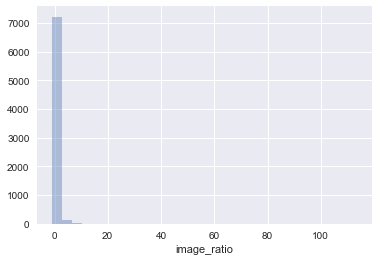

In [62]:
# A:
sns.distplot(evergreen.image_ratio, bins=30, kde=False)

**5.B Test the hypothesis using a logistic regression.**

> **Note**: It is worth thinking about how to best represent this variable. It may not be wise to input the image ratio as-is.

In [13]:
# A:

**5.C Interpret the model.**

In [14]:
# A:

### 6. Fit a logistic regression with multiple predictors.
- The choice of predictors is up to you. Test features you think may be valuable to predict evergreen status.
- Do any EDA you may need.
- Interpret the coefficients of the model.

> **Tip:** [This pdf is very useful for an overview of interpreting logistic regression coefficients.](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf)

In [15]:
# A: